-------------------------------------------------------

# Data Preparation

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import warnings
import os as os
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px lightgray solid !important;
    border-width: .01 !important; #remove borders
    border-top: 0 !important;
  color: black !important;
    border-style: None;
}
</style>

In [3]:
info=pd.read_excel('/Users/Work/Desktop/Work/Projects/2019/data/mm/MMCaseStudy.xlsx',sheetname='info')
rates=pd.read_excel('/Users/Work/Desktop/Work/Projects/2019/data/mm/MMCaseStudy.xlsx',sheetname='rates')
data_dictionary=pd.read_excel('/Users/Work/Desktop/Work/Projects/2019/data/mm/data dictionary.xlsx')
df=info.merge(rates,on='policy_name') #join on policy name

Calculate mean, median, standard deviation, 5th percentile and 95th percentile of each
company’s rate by state.

In [36]:
info.shape 
rates.shape 
np.sum(df.isnull().sum()) #check for nulls

(20076, 32)

(20076, 4)

0

-------------------------------------------------------

# Exercise 1

### a) Calculate mean, median, standard deviation, 5th percentile and 95th percentile of each company’s rate by state. 

In [348]:
df.groupby(['productState'])['MM'].describe(percentiles=[.05,.5,.95])\
[['mean','50%','std','5%','95%']].round(1)
print("MM Rates by State")

,mean,50%,std,5%,95%
productState,,,,,
IL,580.0,514.7,328.8,202.0,1182.4
NJ,836.7,727.3,453.8,339.7,1670.6


MM Rates by State


In [350]:
df.groupby(['productState'])['SometimeDrive'].describe(percentiles=[.05,.5,.95])\
[['mean','50%','std','5%','95%']].round(1)
print("SometimeDrive Rates by State")

,mean,50%,std,5%,95%
productState,,,,,
IL,558.4,517.0,259.7,234.3,1036.2
NJ,749.0,647.4,405.0,320.3,1507.4


SometimeDrive Rates by State


### <b> b) Count the number of policies in each credit tier, by state. Then, determine the top 3 most populated credit tiers, also by state.


In [437]:
tier_count=df.groupby(['creditTier','productState']).size().sort_values(ascending=False)
tier_count.head(3) #top 3 most populated (creditTier,state) tuples

creditTier  productState
E1          NJ              1950
F1          NJ              1924
C1          NJ              1842
dtype: int64

The top 3 most populated credit tiers within each state:

In [436]:
most_pop=df.groupby(['productState', 'creditTier']).size().reset_index()\
.sort_values(['productState',0],ascending=False).rename(columns={0:'count'})
most_pop.groupby('productState').head(3)

,productState,creditTier,count
28,NJ,E1,1950
29,NJ,F1,1924
26,NJ,C1,1842
0,IL,A1,1380
3,IL,D1,1081
2,IL,C1,1053


In [44]:
t=df.groupby(['collDeductible','priorBILimitCode']).size()\
.reset_index(name='count').sort_values(['collDeductible','count'],\
                                       ascending=False)
t.sort_values(['collDeductible','count'],ascending=False).groupby('collDeductible').first()

,priorBILimitCode,count
collDeductible,,
100,4,127
1000,4,1464
150,4,29
1500,1,77
2000,1,247
250,4,945
500,4,3185
750,4,315
NONE,1,3421


In [130]:
df.groupby(['productState', 'creditTier']).head()

,productState,policy_name,revisionId,policyTerm,tenureInMonths,creditScore,creditTier,mailingCity,priorBILimitCode,priorInsuranceAge,...,model,style,vehicleAntiTheftDevice,collDeductible,compDeductible,vehicleAge,isLuxuryVehicle,clientVehicleId_y,MM,SometimeDrive
0,IL,54-385161-36-34,1,3,12,575,F1,Urbana,5,35,...,Patriot,4-cylinder | 4WD,NONE,NONE,NONE,7,N,1e7e9307-f06e-7a77-b4e8-c86c935e149f,285.01,323.69
1,NJ,36-360547-35-34,1,2,6,820,A1,Jersey City,3,35,...,328,4-door Sedan | 4-cylinder,PASSIVE_ALARM,1000,1000,3,L,2c36da81-f34d-7c7c-b215-fc64039bcaa1,724.95,636.03
2,NJ,36-360547-35-34,1,2,6,820,A1,Jersey City,3,35,...,328,4-door Sedan | 4-cylinder,PASSIVE_ALARM,1000,1000,3,L,e295bc9b-d521-7759-1677-b9814003abfd,533.69,501.52
3,NJ,36-360547-35-34,1,2,6,820,A1,Jersey City,3,35,...,RX 350,6-cylinder | 4WD,PASSIVE_ALARM,1000,1000,8,L,2c36da81-f34d-7c7c-b215-fc64039bcaa1,724.95,636.03
4,NJ,36-360547-35-34,1,2,6,820,A1,Jersey City,3,35,...,RX 350,6-cylinder | 4WD,PASSIVE_ALARM,1000,1000,8,L,e295bc9b-d521-7759-1677-b9814003abfd,533.69,501.52
5,NJ,36-388138-34-37,37,1,0,0,X3,East Orange,1,35,...,Accord,4-door Sedan | 4-cylinder,PASSIVE_ALARM,NONE,NONE,10,N,56c7ab0d-eb61-77b6-b331-54f4092ba70e,822.06,793.43
6,NJ,36-388138-34-37,37,1,0,0,X3,East Orange,1,35,...,Accord,4-door Sedan | 4-cylinder,PASSIVE_ALARM,NONE,NONE,10,N,139cd9f7-e634-7f3b-a513-825c796be25e,792.38,742.27
7,NJ,36-388138-34-37,37,1,0,0,X3,East Orange,1,35,...,Accord,4-door Sedan | 4-cylinder,PASSIVE_ALARM,NONE,NONE,10,N,cc3bfd14-c4dc-7d92-a708-c2685a0afdb0,818.11,782.03
8,NJ,36-388138-34-37,37,1,0,0,X3,East Orange,1,35,...,Corolla,4-door Sedan | 4-cylinder,PASSIVE_ALARM,NONE,NONE,4,N,56c7ab0d-eb61-77b6-b331-54f4092ba70e,822.06,793.43
9,NJ,36-388138-34-37,37,1,0,0,X3,East Orange,1,35,...,Corolla,4-door Sedan | 4-cylinder,PASSIVE_ALARM,NONE,NONE,4,N,139cd9f7-e634-7f3b-a513-825c796be25e,792.38,742.27


In [127]:
df.groupby(['productState', 'creditTier']).size().reset_index()\
.sort_values(0,ascending=0).rename(columns={0:'count'}).groupby('productState').head(5)

,productState,creditTier,count
28,NJ,E1,1950
29,NJ,F1,1924
26,NJ,C1,1842
27,NJ,D1,1707
45,NJ,X3,1662
0,IL,A1,1380
3,IL,D1,1081
2,IL,C1,1053
4,IL,E1,988
1,IL,B1,974


In [112]:
df.groupby(['productState', 'creditTier']).

In [123]:
df.groupby(['productState', 'creditTier']).size()\
.reset_index(name='count').groupby('productState')

,productState,creditTier,count
0,IL,A1,1380
1,IL,B1,974
2,IL,C1,1053
3,IL,D1,1081
4,IL,E1,988
24,NJ,A1,726
25,NJ,B1,1145
26,NJ,C1,1842
27,NJ,D1,1707
28,NJ,E1,1950


-------------------------------------------------------

# Exercise 2

### a)  Create a histogram of rate relativity between MM and Company SometimeDrive by state.

Below is a histogram of MM premium relative to SometimeDrives', color coded by state.

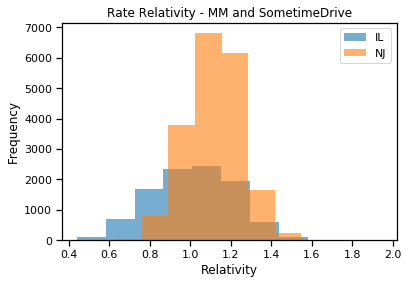

In [439]:
rel=df[['productState','MM','SometimeDrive']]
rel['relativity']=rel.MM/rel.SometimeDrive
rel.groupby('productState').relativity.plot(kind='hist',alpha=.6)
plt.legend()
plt.xlabel('Relativity')
plt.title('Rate Relativity - MM and SometimeDrive');

### i.  What’s the number of customers who have an absolute rate difference that is more than 15% compared to Company SometimeDrive?

13527 MM customers have an absolute rate difference that is more than 15% compared to Company Sometime Drive.

In [440]:
len(rel[rel.relativity>1.15])
len(rel[rel.relativity<.85])
11017+2510

11017

2510

13527

### b) Use charts and tables to illustrate the relationship between vehicle model year and the selection of collision coverage. Please describe your observation.

Below, I plot vehicle model year against the % of polices with each collDeductible value (the level of collision coverage purchased).  I assume collDeductible with a NONE value means collision coverage was purchased with no deductible, meaning maximal coverage.  The lower the deductible, the greater amount of coverage purchased.

As vehicle model year increases, insureds opt for less collision coverage.

1. More precisely, as vehicle model year increases, a greater percentage of vehicles with that model year have a given collision deductible that is nonzero (level of collision coverage). 
2. The rate of increase in the % of vehicles that get collision coverage for a one unit change in model year is greater for higher deductibles.  This means insureds have a stronger preference for less coverage as model year increases.

3. You can see that the % of vehicles with no deductible (maximal collision coverage) decreases as model year goes up.

In [131]:
coll=pd.crosstab(df.year,df.collDeductible)
coll_perc=coll.apply(lambda x: x/x.sum(),axis=1)
coll_perc=coll_perc.reset_index()
coll_perc=coll_perc.loc[:,['year','NONE','100','150','250','500','750','1000','1500','2000']]

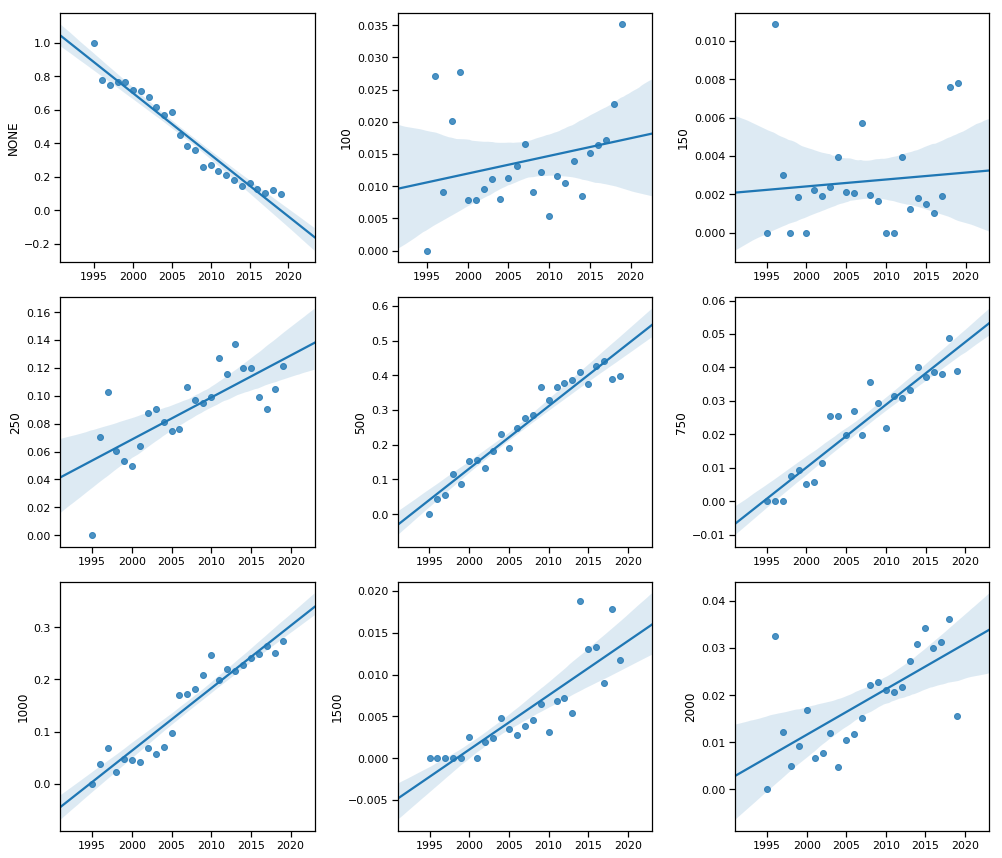

In [445]:
InteractiveShell.ast_node_interactivity = "last_expr" #disable MPL output from having set to "all"
fig = plt.figure(figsize=(14,12))
for j in range(1,len(coll_perc.columns)):  
    ax_j = fig.add_subplot(3, 3, j)
    sns.regplot('year',coll_perc.columns[j],data=coll_perc,ax=ax_j)
    ax_j.set_xlabel('') #remove year
    fig.tight_layout(pad=1); #spacing around plots

-------------------------------------------------------

# Exercise 3

###  If you were to offer multi-car discount (a discount based on the number of vehicles on the policy) to MM customers, how much discount would you offer, if at all?

I would offer a discount only to MM customers with a rate higher than the competitor company, to decrease the likelihood of losing their business.  The premium discount would then need to be at least the amount of difference between the two rates, to bring MM's rate down to the level of its competitor's rate.  The minimum multicar discount necessary to do this is calculated below.  

If MM has a rate lower than its competitor, then the insured would only pay more premium by leaving, so I would not consider these policies with MM rates lower than the competitors' as getting a multicar discount.

In [449]:
InteractiveShell.ast_node_interactivity = "all"

In [452]:
df['mm_rate_diff']=df[['SometimeDrive','MM']].diff(axis=1).where(df['high_rate']==True).fillna(0)['MM']
df[['policy_name','mm_rate_diff']].head() #first 5 policies
print('Minimum multi-car discounts necessary to potentially drive insureds away from competitor, holding all other factors constant. ')

,policy_name,mm_rate_diff
0,54-385161-36-34,0.00
1,36-360547-35-34,88.92
2,36-360547-35-34,32.17
3,36-360547-35-34,88.92
4,36-360547-35-34,32.17


Minimum multi-car discounts necessary to potentially drive insureds away from competitor, holding all other factors constant. 


-------------------------------------------------------

# Exercise 4
###  Please describe the attributes of customers who tend to get a lower rate(rate relativity) from MM, as compared to SometimeDrive’s rate. How did you arrive at that conclusion?

From the below analysis, MM customers with lower rates tend to have attributes that are commonly as follows:

1. They have older model year vehicles.
2. They are in either state, while high rate customers are more likely to be in NJ.
3. They have no collision coverage deductible (which either means maximal coverage or no coverage, depending on what value NONE means)
4. They have no antitheft device. High rate customers are much more likely to have a passive alarm installed.
5. They have 1 driver on a policy. High rate customers are more likely to have 2 drivers on a policy.
6. They have no comprehensive coverage deductible (which either means maximal coverage or no coverage, depending on what value NONE means).

A more detailed breakdown of the process that led to the above conclusions is shown below.

-------------------------------------------------------

Below, creditTier, totalBIPoints, and age are inspected to observe if they have different values for low rate vs non-low rate customers. Little difference is found. For each attribute, the percentage of policies with each attribute value is shown, grouped by low rate (customers who get a lower rate from MM where relativity < 1) and non-low rate (relativity > 1) customers.

In [23]:
df['relativity']=df.MM/df.SometimeDrive
low_rate=df[df.relativity<1].reset_index(drop=True)
high_rate=df[df.relativity>1].reset_index(drop=True)
df['low_rate']=df.relativity<1
df['high_rate']=df.relativity>1

In [133]:
t=pd.DataFrame(df.groupby('low_rate').creditTier.value_counts())

KeyError: 'low_rate'

In [143]:
t=pd.DataFrame(df.groupby('collDeductible').creditTier.value_counts())

In [164]:
t=pd.DataFrame(df.groupby(['collDeductible','creditTier']).size())
t.groupby('collDeductible').apply(lambda x:x/float(x.sum()))

0
collDeductible creditTier          
100            A1          0.038265
               B1          0.155612
               C1          0.117347
               D1          0.107143
               E1          0.102041
               F1          0.071429
               G1          0.045918
               H1          0.063776
               I1          0.043367
               J1          0.061224
               K1          0.030612
               L1          0.017857
               N1          0.010204
               O1          0.007653
               Q1          0.002551
               R1          0.002551
               T3          0.020408
               T5          0.002551
               X3          0.076531
               X4          0.022959
1000           A1          0.078137
               B1          0.069772
               C1          0.099810
               D1          0.103612
               E1          0.097719
               F1          0.091825
               G1          0.079087
               H1          0.072053
               I1          0.057034
               J1          0.051141
...                             ...
750            R1          0.004711
               T3          0.023557
               T4          0.001178
               X3          0.085984
               X4          0.005889
               X5          0.003534
NONE           A1          0.036815
               B1          0.050484
               C1          0.066946
               D1          0.070837
               E1          0.087299
               F1          0.094383
               G1          0.080116
               H1          0.067744
               I1          0.106256
               J1          0.059962
               K1          0.053976
               L1          0.038811
               M1          0.016562
               N1          0.013170
               O1          0.010875
               P1          0.009977
               Q1          0.010376
               R1          0.005088
               T3          0.010476
               T4          0.002993
               T5          0.003692
               X3          0.083508
               X4          0.009977
               X5          0.009678

[190 rows x 1 columns]

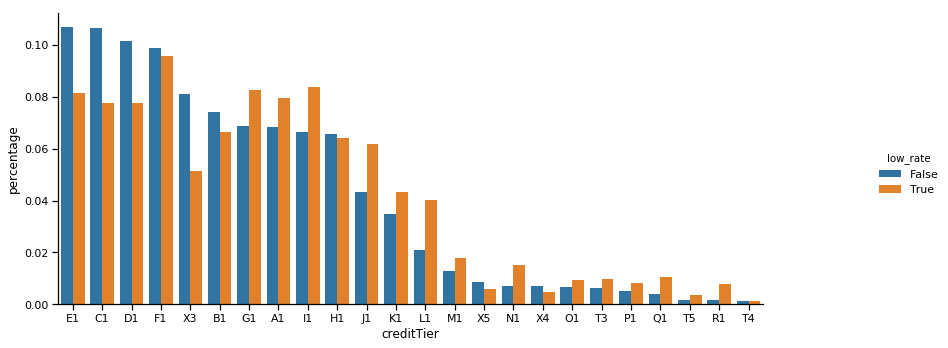

In [290]:
t=pd.DataFrame(df.groupby('low_rate').creditTier.value_counts())
t=t.groupby(level=0).apply(lambda x:100 * x/100 / float(x.sum()))
t=pd.DataFrame(t)
t.columns=['percentage']
t=t.reset_index()
g=sns.catplot(x='creditTier',y='percentage',hue='low_rate',kind='bar',data=t)
g.fig.set_size_inches(15,5);

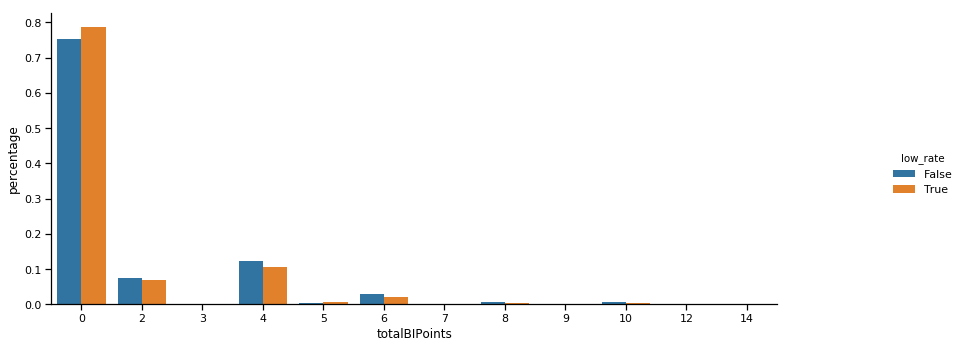

In [291]:
t=pd.DataFrame(df.groupby('low_rate').totalBIPoints.value_counts())
t=t.groupby(level=0).apply(lambda x:100 * x/100 / float(x.sum()))
t=pd.DataFrame(t)
t.columns=['percentage']
t=t.reset_index()
g=sns.catplot(x='totalBIPoints',y='percentage',hue='low_rate',kind='bar',data=t)
g.fig.set_size_inches(15,5);

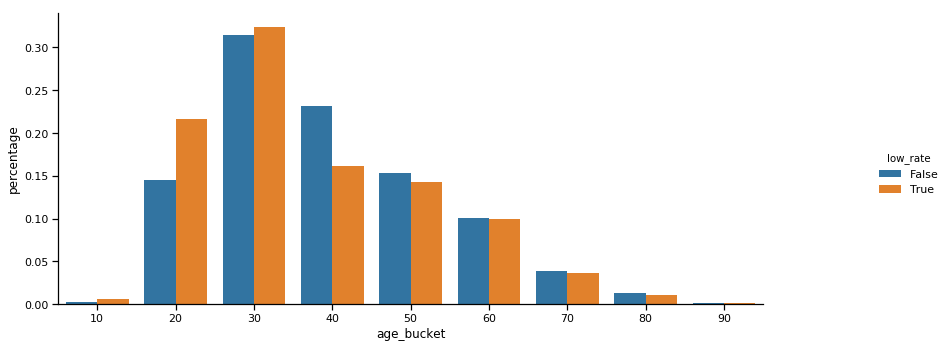

In [289]:
df['age_bucket']=df.maxDriverAge//10*10
t=pd.DataFrame(df.groupby('low_rate').age_bucket.value_counts())
t=t.groupby(level=0).apply(lambda x:100 * x/100 / float(x.sum()))
t=pd.DataFrame(t)
t.columns=['percentage']
t=t.reset_index()
g=sns.catplot(x='age_bucket',y='percentage',hue='low_rate',kind='bar',data=t)
g.fig.set_size_inches(15,5);

Going through each attribute to inspect for relatedness to low rate customers would be time consuming, as was done above.  Therefore, feature importances are generated from a Random Forest model to show the most important attributes in predicting low rate customers.  Then, the relationship between these attributes and low rate customers is examined.

### Generating Feature Importances from a Random Forest to Assess Most Predictive Features of low rate customers

Below are feature importances from a Random Forest Classifier that predicts whether a policy will have a lower rate than company SometimeDrive from other policy information.  A feature importance associated with a given feature has a greater value if that feature is more important in predicting the outcome variable in the model.  These importances are used to judge which features/attributes are most correlated to/predictive of customers who get a lower rate.

In [161]:
X=df.drop(['policy_name','MM','SometimeDrive','relativity',
           'clientVehicleId_x','clientVehicleId_y',
          'low_rate','high_rate','age_bucket'],axis=1)
y=df.low_rate
X2=pd.get_dummies(X)

In [174]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5,
                             random_state=0)
clf.fit(X2,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

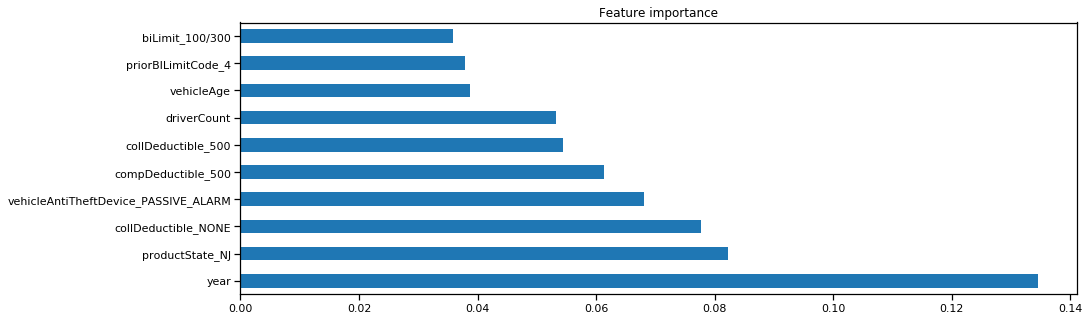

In [284]:
feat_imp=pd.Series(clf.feature_importances_, index=X2.columns).sort_values(ascending=False)
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(15,5))
feat_imp.head(10).plot(kind='barh', title='Feature importance')

In [208]:
temp=pd.DataFrame(df.groupby('low_rate').year.value_counts())
temp.columns=['count']
temp=temp.reset_index()

Attributes most related to low rate MM customers are shown below.  For each attribute, the proportion of observations having each value of that attribute, grouped by low rate and high rate customers is shown.  

Observations drawn from below visuals.
1. Low rate customers are more likely to have older model year vehicles.  More exactly, a greater percentage of low rate customers have older model years than high rate customers.
2. High rate customers are more likely to be in NJ.  Low rate customers are likely to be in either state.
3. Low rate customers are much more likely to have no collision coverage deductible (which either means maximal coverage or no coverage, depending on what value NONE means)
5.  Low rate customers are more likely to have 1 driver on a policy.  High rate customers are more likely to have 2 drivers on a policy.
6.  Low rate customers are more likely to have no comprehensive deductible (which either means maximal coverage or no coverage, depending on what value NONE means).

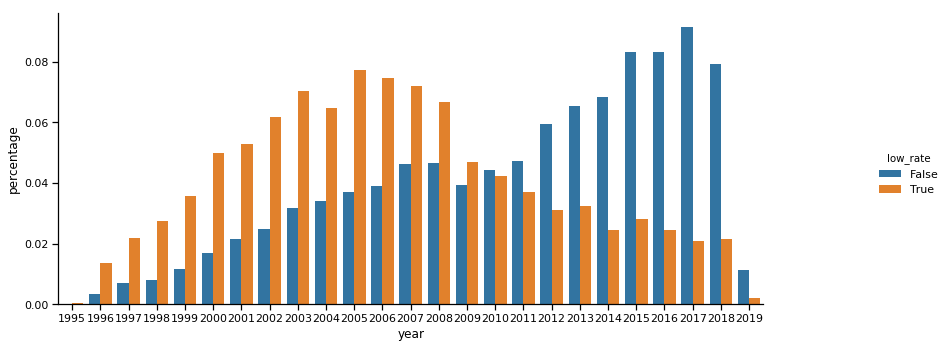

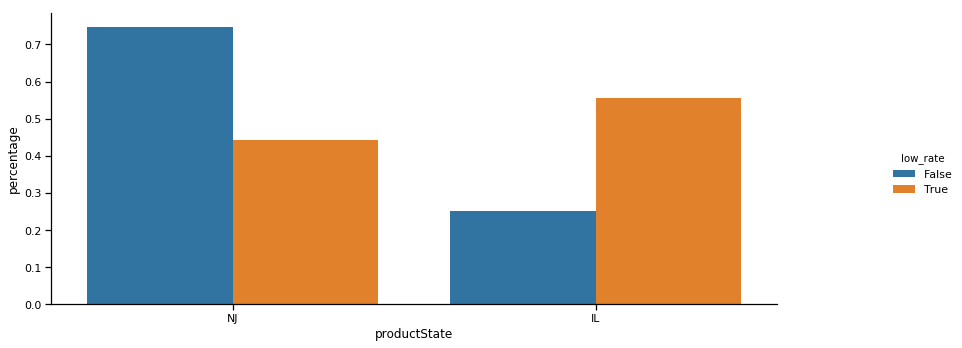

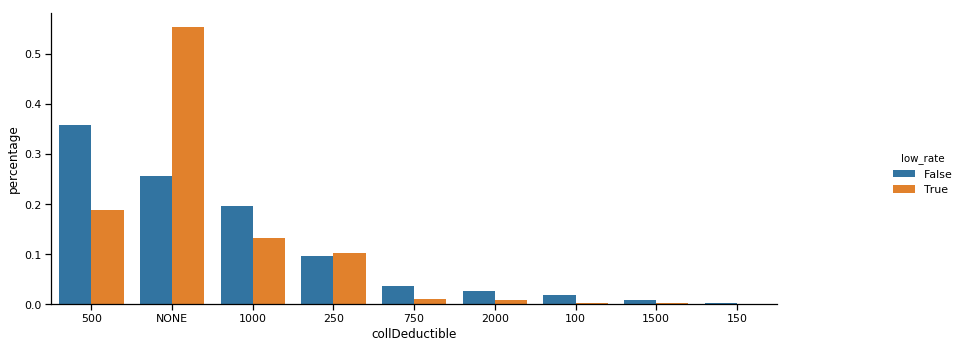

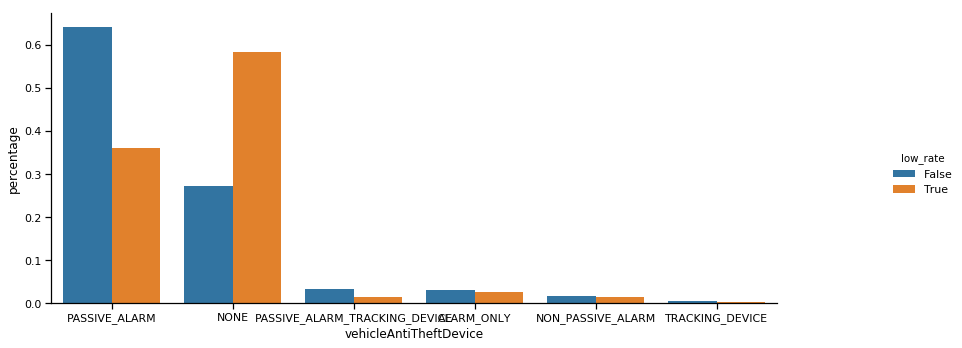

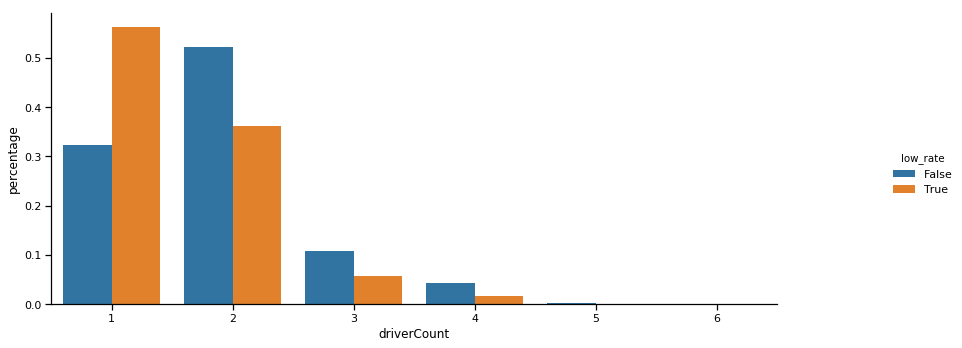

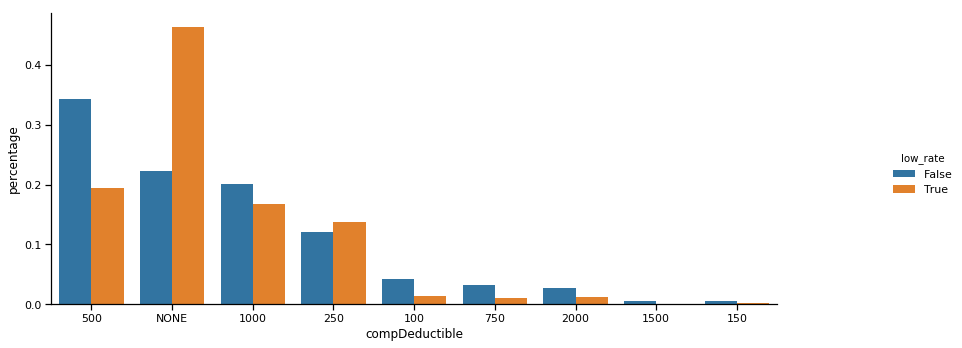

In [304]:
high_imps=['year','productState','collDeductible',
           'vehicleAntiTheftDevice','driverCount','compDeductible']

for j in high_imps:  
    t=pd.DataFrame(df.groupby('low_rate')[j].value_counts())
    t=t.groupby(level=0).apply(lambda x:100 * x/100 / float(x.sum()))
    t=pd.DataFrame(t)
    t.columns=['percentage']
    t=t.reset_index()
    sns.set_context("notebook", font_scale=1)
    plt.figure(figsize=(15,5))
    g=sns.catplot(x=j,y='percentage',hue='low_rate',kind='bar',data=t)
    g.fig.set_size_inches(15,5);

### Running K-Means Clustering with K=2 

K-Means with K=2 is run to assess whether the data can be segmented into clusters to separate low rate and high rate customers into each cluster. The results do not appear to show good segmentation of low/high rate customers, since each cluster has about 30% of its observations as low rate customers.  It would be ideal to see the majority of low rate customers in one cluster and the majority of high rate customers in another cluster.  Then the values of the attributes in each cluster could be assessed to determine the attributes of customers with low rates that differentiate these customers from those with high rates.  

The clusters do appear to segment customers in some way, just not according to low rate vs high rate customers.  For example, observe below that Cluster 1 (red) has higher credit scores than Cluster 2.

In [251]:
from sklearn.cluster import KMeans
import copy
km_data=copy.deepcopy(X2)
km_data['low_rate']=y
km=KMeans(n_clusters=2,random_state=0).fit(km_data)
km_data['cluster']=km.labels_

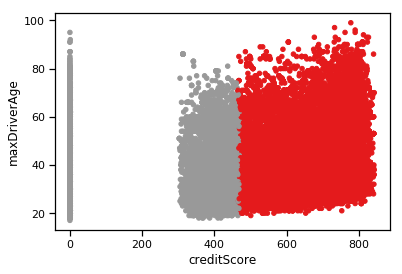

In [280]:
from matplotlib import cm
cmap = cm.get_cmap('Set1')
km_data.plot.scatter(x='creditScore',y='maxDriverAge', c=km_data.cluster, cmap=cmap,colorbar = False)

Code is shown below that shows similar percentages of low rate customers in each cluster.

In [271]:
km_data.groupby(['cluster','low_rate']).size()
5435/(5435+15046.0)
2893/(2893+6068.0)

cluster  low_rate
0        False       15046
         True         5435
1        False        6068
         True         2893
dtype: int64

0.2653679019579122

0.32284343265260573